 ### Неделя 13: Введение в численные методы в задачах научных вычислений.

Литература: 
- Р.В.Хемминг, Численные методы для научных работников и инженеров.

**Численные методы** = методы решения расчётных задач на компьютере.

Важно понимать, что не все математические задачи имеют аналитическое решение (оно или ещё не найдено, или даже если имеется, то его нереально использовать из-за громоздкости выражений, большого числа особых случаев и т.д.).

Но практические расчёты (обработка данных эксперимента, другие инженерные расчёты, определение параметров установки для будущих экспериментов) допускают наличие погрешности, и точность в 4-5 значащих цифры для многих применений является достаточной. Это позволяет обходиться в расчётах приближёнными численными методами.

Вспомним ряд Тейлора из высшей математики:

$
f(x) 
 = f(x_0) + (x-x_0) f'(x_0) +  \frac{(x-x_0)^2}{2!} f''(x_0) + ... 
 = \sum \limits_{n=0}^{\infty} { 
     \frac{(x-x_0)^n}{n!} f^{(n)}(x_0) }
$

Это даёт надежду рассчитать искомое значение функции при помощи конечного  (желательно небольшого) числа слагаемых с оптимистичной оценкой точности результата (вспомним так называемую "о-нотацию": о-малое, о-большое).

$
f(h) 
 =
\sum \limits_{n=0}^{K} { 
     \frac{h^n}{n!} f^{(n)}(0) } 
   + o( h^K )
 \simeq
\sum \limits_{n=0}^{K} { 
     \frac{h^n}{n!} f^{(n)}(0) } 
$

<i>Этот принцип приближенного расчета при помощи суммы будет часто использоваться далее на протяжении всего этого курса - и в теории, и задачах. Например, численное интегрирование на следующем занятии иногда использует суммирование по определению, а иногда помогает преобразование искомого интеграла в сумму бесконечного ряда.</i>


### Интерполяция числовых данных при помощи полинома (<i>Polyfit</i>)

Часто возникает задача приблизить набор точек $\{ x_i, y_i \}$ формулой (подгонка параметров, англ. <i>fitting</i>).
Действительно, если известно несколько экспериментальных точек, из них можно получить приближенную общую формулу и рассчитать значения в точках, где эксперимент не проводился или невозможен (например, движение космических тел или молекул в газе, уникальные эксперименты с дорогими расходными материалами или образцами).
<i>Также это нужно на ваших лабораторных работ по общей физике.</i>
     
Конечно, при выборе формулы необходимо понимать суть описываемого явления и учитывать разумные ограничения на коэффициенты. Так, например, скорость движения не должна превышать скорость света, и многие физические величины - масса, размеры - должны оставаться положительными. Понимая это, рассмотрим полиномиальное приближение.

Вспоминая про ряд Тейлора, можно согласиться, что имеет смысл попробовать приблизить искомую зависимость полиномиальной функцией.

Для демонстрации попробуем приблизить наш набор точек прямой линией с коэффициентами $A$, $B$:
    
$
    y_{AB}(x) = A + Bx
$


Введём меру, по которой можно оценить качество нашего приближения к заданным значениям:
    
$
    S(A,B) = \sum \limits_i { \left[ y_{AB}(x_i) - y_i \right]^2 } >= 0
$

Сумма квадратов по всем точкам - похоже на формулу для расстояния между точками в декартовом пространстве. 
Чем ближе формула к данным в каждой точке, тем величина S будет ниже, и в идеальном случае будет ноль. 
Если найти минимум этой функции, мы определим параметры, хорошо приближающие исходные данные.
Этот подход называется <b>линейным методом наименьших квадратов</b>.

Видно, что получилась достаточно простая функция от параметров $A$,$B$ и точку минимума можно найти стандартным способом:

$
\begin{cases}
\frac{\partial S}{\partial A}= 0,\\
\frac{\partial S}{\partial B}= 0
\end{cases}
$

$
\begin{cases}
\frac{\partial S}{\partial A}= 2 \sum \limits_i { \left[ y_{AB}(x_i) - y_i \right] }
= 2 \sum \limits_i { \left( A + B x_i - y_i \right) } = 0, \\
\frac{\partial S}{\partial B}= 2 \sum \limits_i { \left[ y_{AB}(x_i) - y_i \right] x_i }
= 2 \sum \limits_i { \left( A x_i + B x_i^2 - y_i x_i \right) } = 0,
\end{cases}
$

и окончательно

$
\begin{cases}
A \sum \limits_i { 1 } + B \sum \limits_i { x_i } = \sum \limits_i { y_i }, \\
A \sum \limits_i { x_i } + B \sum \limits_i { x_i^2 } = \sum \limits_i { x_i y_i },
\end{cases}
$
    
т.е. мы получили систему 2 линейных алгебраических уравнений (СЛАУ) относительно двух неизвестных A,B
    
$ 
\hat M \cdot
\begin{pmatrix}
A \\ B
\end{pmatrix}
= 
\begin{pmatrix}
R_0 \\ R_1
\end{pmatrix}
$

где элементы матрицы $\hat M$ и вектор правой части 
$\begin{pmatrix}
R_0 \\ R_1
\end{pmatrix}$ задаются выражениями

$
M_{pq} = \sum \limits_i { x_i^{p+q} },\\
R_p = \sum \limits_i { x_i^{p} y_i }
$
    
и индексы $p$,$q$ начинают отсчитываться с нуля.

**Расширение** формул на полиномы более высокой степени очевидно! 
    
Умножим слева на обратную матрицу и получим решение:

$\begin{pmatrix}
A \\ B
\end{pmatrix} = \hat M^{-1} 
\cdot
\begin{pmatrix}
R_0 \\ R_1
\end{pmatrix}$

***Пример:***


coeffs: A= 0.7857142857142865 B= 0.267857142857143


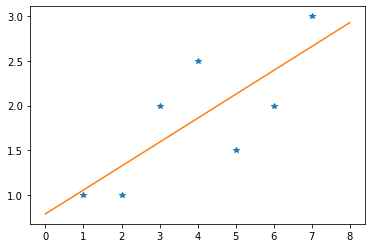

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x = [1, 2, 3, 4, 5, 6, 7]
y = [1, 1, 2, 2.5, 1.5, 2, 3]
# элементы матрицы M
m00 = len(x) # сумма единиц = длина массива
m01 = sum(x) 
m10 = m01
m11 = sum(np.square(x)) # сумма квадратов
# элементы вектора правой части R
r0 = sum(y) 
r1 = np.dot(x,y) # скалярное произведение векторов x и y
# собираем значения в матрицу M и вектор R
m = [[m00, m01], # первая строчка матрицы
     [m10, m11]] # вторая строчка матрицы
r = [[r0],
     [r1]] # вектор R - столбец
ab = np.dot( np.linalg.inv(m), r ) # используем функции linalg.inv и dot 
a = ab[0][0] # два индекса, т.к. ab - матрица (результат умножения двух матриц)
b = ab[1][0]
print("coeffs: A=", a, "B=", b)
# нарисуем график
plt.plot(x,y,'*')
xgraph = np.linspace(0,8)
ygraph = a + b*xgraph 
plt.plot(xgraph, ygraph)

**Ограничение**: метод работает, когда $\det { \hat M } \neq 0$ (т.е. существует единственное решение)

Когда может быть много решений? т.е. есть несколько разных прямых, приближающих наши данные?
 - совпадающие точки (x,y) (т.е. через одну толчку можно провести много линий)
 - недостаточное число данных для данной степени полинома, тогда строки матрицы являются линейно зависимыми и $\det { \hat M } = 0$

Учитывая эти особенности, в остальных случаях данный метод очень удобен и широко распространён.

В следующем семестре мы вернёмся к этой теме и освоим приближение числовых данных функциями любого вида, не только полиномами - это так называемый **нелинейный метод наименьших квадратов**.

**Заключение**

Этот метод настолько стандартен и общеизвестен, что в большинстве математических пакетов уже реализован.

Функции называются:
 - <b>polyfit</b> (англ. <i>polynomial fitting = "подгонка полиномом"</i>, возвращает коэффициенты полинома заданной степени)
 - <b>polyval</b> (англ. <i>polynomial values = "значения полинома"</i>, возвращает значения этого полинома для произвольных входных данных)

**Пример использования:**

коэффициенты прямой линии:  [0.26785714 0.78571429]
коэффициенты параболы:  [-0.00595238  0.31547619  0.71428571]


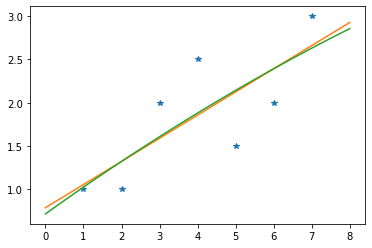

In [ ]:
plt.plot(x,y,'*')
# аргументы функции polyfit: массив X, массив Y, 
#  и третий параметр - степень полинома (1=линейная функция, 2=парабола и т.д.)
p1 = np.polyfit(x,y,1) 
print("коэффициенты прямой линии: ", p1)
xgraph = np.linspace(0,8)
# аргументы функции polyval: коэффициенты полинома и значения X для расчета
ygraph1 = np.polyval(p1, xgraph)
plt.plot(xgraph, ygraph1)
# теперь приблизим полиномом 2 порядка
p2 = np.polyfit(x,y,2) 
print("коэффициенты параболы: ", p2)
ygraph2 = np.polyval(p2, xgraph)
plt.plot(xgraph, ygraph2)

<i>Интересно, что приближение параболой почти не отличается от прямой линии. Но так получилось для конкретно этих чисел, а вообще, конечно, отличаться будет.</i>

Попробуем повысить степень полинома до 4:

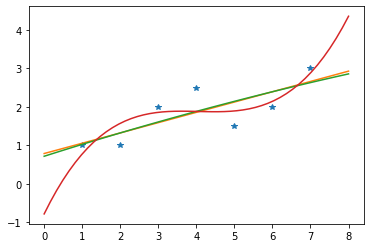

In [ ]:
plt.plot(x, y, '*')
plt.plot(xgraph, ygraph1)
plt.plot(xgraph, ygraph2)
p4 = np.polyfit(x,y,3)
ygraph4 = np.polyval(p4, xgraph)
plt.plot(xgraph, ygraph4)

Как видно, повышение степени полинома не всегда оправдано: могут возникнуть артефакты с большими отклонениями и даже нефизические результаты (отрицательные расстояния, скорость выше скорости света и так далее). 

При выборе метода аппроксимации нужно учитывать суть описываемого явления и известные теоретические модели для него. Так, например, движение тела в поле тяжести, как мы знаем, описывается параболой, поэтому нам будет достаточно полинома 2 порядка. Другие физические явления описываются своими моделями и их следует принимать во внимание.

***Пример***: найти время полураспада радиоактивного изотопа, имея данные об активности:

$
A_i = A_0 exp(-\frac{t_i}{\tau})
$

Возьмём логарифм:

$
\ln (A_i) = \ln(A_0) - \frac{t_i}{\tau}
$

и далее применив <i>polyfit</i> к логарифму от активности, можем определить постоянную времени $\tau$.

Погрешность результата будет определяться флуктуациями экспериментальных значений из-за статистической природы данного явления.

<i>Примечание 1</i>: Очевидно, что время полураспада является положительной величиной. Однако большая погрешность данных или недостаточное количество точек могут дать нам отрицательное значение - следует понимать суть явления, выбирать подходящую модель и следить за качеством входных данных. 

<i>Примечание 2</i>: это простая задача. Если продукт распада не является стабильным изотопом и даёт собственный вклад в активность, либо имеется несколько путей распада -- тогда в формуле будет несколько экспонент и задача решается иначе.


***Ключевые слова для дальнейшего чтения и развития:***
 - аппроксимация
 - экстраполяция
 - интерполяция


<i> Примечание:</i> В следующем семестре мы вернёмся к этой теме и освоим приближение числовых данных функциями любого вида, не только полиномами -- это так называемый **нелинейный метод наименьших квадратов**.

